**Author: Suresh Lokiah<br>LinkedIn: linkedin.com/in/sureshlokiah<br>Email: (sureshlokiah@gmail.com)<br>**

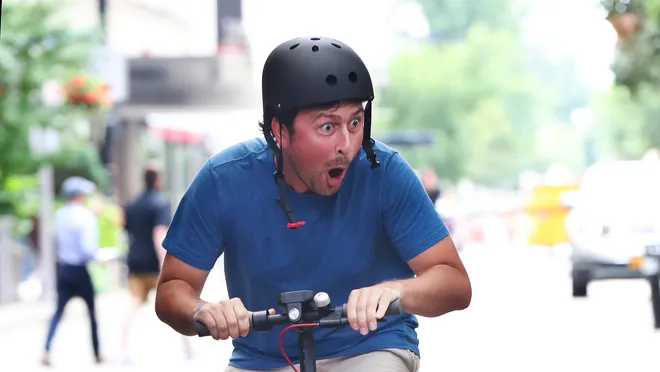

( Image Credits: https://www.courier-journal.com/story/news/politics/metro-government/2019/06/20/louisville-bird-lime-may-be-joined-5-dockless-scooters-lyft-jump-spin-bolt/1499757001/ )

# Introduction

This exercise introduces the concepts of Data Wrangling and Machine Learning using dockless(scooter and bike) *Trips* data from Louisville, KY https://data.louisvilleky.gov/dataset/dockless-vehicles. The datafile used here is downloaded from the link showing 'Dockless Trips 02/01/2020-07/08/2020'. 

The data.louisvilleky.gov website also provides the data definition for the fields listed in the data.

**Stages**

The exercise is organized (roughly) in these stages 
1. Data Handling
2. Perform EDA
3. Cleanup
4. Visualizing the Data (Numeric and Spatial data)
5. Machine Learning - doing Model selection


In [1]:
## Install and Update python packages

#!pip install pandas
#!pip install seaborn 
#!pip install sklearn

#!pip3 list --outdated --format=freeze | grep -v '^\-e' | cut -d = -f 1 | xargs -n1 pip3 install -U 

In [2]:
## Import 

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import seaborn as sns

## Check if we have the latest version of Pandas, if not lets upgrade
pd.__version__

'1.4.3'

# Stages

## Data Handling

In [3]:
### Open Google Drive and download 'Louisville-Dockless-Trips.csv'

#from google.colab import drive 
#drive.mount("/content/gdrive")
#df = pd.read_csv('/content/gdrive/My Drive/Louisville-Dockless-Trips.csv')

In [4]:
# Load Dataset
df = pd.read_csv('/Users/suresh/Downloads/Louisville-Dockless-Trips.csv')

## Perform EDA

In [5]:
## Find the count of (Rows, Columns)

df.shape

(32962, 13)

So the dataset is made up of **32962 Rows and 13 Columns**

In [6]:
# Checkout the Rows and Columns and DataTypes

df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32962 entries, 0 to 32961
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TripID          32962 non-null  object 
 1   StartDate       32962 non-null  object 
 2   StartTime       32962 non-null  object 
 3   EndDate         32962 non-null  object 
 4   EndTime         32962 non-null  object 
 5   TripDuration    32962 non-null  int64  
 6   TripDistance    32962 non-null  float64
 7   StartLatitude   32962 non-null  float64
 8   StartLongitude  32962 non-null  float64
 9   EndLatitude     32962 non-null  float64
 10  EndLongitude    32962 non-null  float64
 11  DayOfWeek       32962 non-null  int64  
 12  HourNum         32962 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 3.3+ MB


In [7]:
## Review the first few rows for data in column

df.head()

TripID StartDate StartTime   EndDate EndTime  \
0  dd62d00f-11cf-5a7b-b6df-a1917e90eb09  2/1/2020      8:15  2/1/2020    8:30   
1  ea963a4b-b2b9-5ab9-8442-cbff3878e32c  2/1/2020      8:30  2/1/2020    8:45   
2  d081f7b8-5d6f-54a8-adf1-fa2c931b8440  2/1/2020      8:45  2/1/2020    8:45   
3  135100da-29e7-5e7b-b150-73784e2d983f  2/1/2020      9:00  2/1/2020    9:00   
4  2fea57ae-fb0e-5538-85a3-749d4854cfcd  2/1/2020      9:15  2/1/2020    9:30   

   TripDuration  TripDistance  StartLatitude  StartLongitude  EndLatitude  \
0            14         1.358         38.233         -85.741       38.245   
1             6         0.195         38.257         -85.756       38.255   
2             3         0.118         38.256         -85.757       38.257   
3             3         0.252         38.217         -85.763       38.220   
4            16         0.434         38.224         -85.759       38.228   

   EndLongitude  DayOfWeek  HourNum  
0       -85.759          7        8  
1       -85.758          7        8  
2       -85.757          7        8  
3       -85.762          7        9  
4       -85.758          7        9

In [8]:
# Convert to datetime[ns] field 

df.StartDate = df.StartDate.astype('datetime64[ns]')
df.EndDate = df.EndDate.astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32962 entries, 0 to 32961
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TripID          32962 non-null  object        
 1   StartDate       32962 non-null  datetime64[ns]
 2   StartTime       32962 non-null  object        
 3   EndDate         32962 non-null  datetime64[ns]
 4   EndTime         32962 non-null  object        
 5   TripDuration    32962 non-null  int64         
 6   TripDistance    32962 non-null  float64       
 7   StartLatitude   32962 non-null  float64       
 8   StartLongitude  32962 non-null  float64       
 9   EndLatitude     32962 non-null  float64       
 10  EndLongitude    32962 non-null  float64       
 11  DayOfWeek       32962 non-null  int64         
 12  HourNum         32962 non-null  int64         
dtypes: datetime64[ns](2), float64(5), int64(3), object(3)
memory usage: 3.3+ MB


In [9]:
## Check the date range

print("Range of Start Date  = " + str(df.StartDate.min()) + " - " +  str(df.StartDate.max()))

Range of Start Date  = 2020-02-01 00:00:00 - 2020-07-08 00:00:00


In [10]:
#Describe the data

df.describe()

TripDuration  TripDistance  StartLatitude  StartLongitude  \
count  32962.000000  32962.000000   32962.000000    32962.000000   
mean      21.033099      1.096729      38.244277      -85.738711   
std       24.094454      4.213029       0.098125        0.777303   
min        0.000000      0.000000      33.437000     -121.987000   
25%        5.000000      0.092000      38.230000      -85.757000   
50%       13.000000      0.543000      38.251000      -85.745000   
75%       29.000000      1.339000      38.258000      -85.735000   
max     1013.000000    596.139000      50.110000        8.674000   

        EndLatitude  EndLongitude     DayOfWeek       HourNum  
count  32962.000000  32962.000000  32962.000000  32962.000000  
mean      38.244402    -85.738567      4.182908     17.093198  
std        0.098135      0.777202      2.136368      3.981464  
min       33.423000   -121.895000      1.000000      6.000000  
25%       38.230000    -85.757000      2.000000     14.000000  
50%       38.251000    -85.745000      4.000000     18.000000  
75%       38.258000    -85.736000      6.000000     20.000000  
max       50.117000      8.685000      7.000000     23.000000

**TripDuration** 
* mean: 21.033099 and std:  24.094454 - Shows (likely) issues with data because the difference of (mean - std) would be -ve value 
* mean: 21.033099 and 50%: 13.000000	- indicates that the data is right skewed.
* max: 1013.000000 - is likely a outlier or bad data
* min: 0.000000	- has 0's for Trip Duration that must be dropped.

**TripDistance**
* min: 0.000000 - has 0s for Trip Distance that must be dropped
* max: 596.139000 - is likely a outlier or bad data

**DayOfWeek**
* min: 1 and max: 7 representing 7 days, and 1 being 'Sunday' from the data defininition - https://data.louisvilleky.gov/dataset/dockless-vehicles.

**HourNum**
* min: 6.000000 and max: 23.000000 indicating data between 06:00 to 23:00 (and not 23:01 or 23:05...)

## Cleanup

1. Drop duplicate rows (if any)
2. Drop rows having 0's in Trip Duration or Trip Distance
3. Create new Field DayOfWeekStr from DayOfWeek field

### Drop duplicate rows

In [11]:
# Check if there is any duplicate rows; 
#  Zero would indicate no duplicates. 

print(len(df) - len(df.drop_duplicates()))

0


### Drop rows having 0's

In [12]:
# Count the rows having TripDistance == 0 and TripDuration == 0

print(len(df[(df.TripDistance == 0) & (df.TripDuration == 0)]))

72


In [13]:
## Drop rows having 0's in the TripDistance and TripDuration

df = df[(df.TripDistance != 0) & (df.TripDuration != 0)]

In [14]:
df.shape

(31847, 13)

### Create new Field 

In [15]:
## Convert DayOfWeek Number to String and save it in a new field DayOfWeekStr

d_to_week = { 
             1: 'Sunday',
             2: 'Monday',
             3: 'Tuesday',
             4: 'Wednesday',
             5: 'Thrusday',
             6: 'Friday',
             7: 'Saturday'
             }

df['DayOfWeekStr'] = df.DayOfWeek.replace(to_replace=d_to_week)
df.DayOfWeekStr.head()

0    Saturday
1    Saturday
2    Saturday
3    Saturday
4    Saturday
Name: DayOfWeekStr, dtype: object

## Visualizing the Data

1. Graph discrete data( HourNum, DayOfWeek)
2. Graph continuous data(TripDuration, TripDistance) 
3. Graph the Geo data (Lat, Long)

### Graph discrete data

#### Plot Counts by HourNum

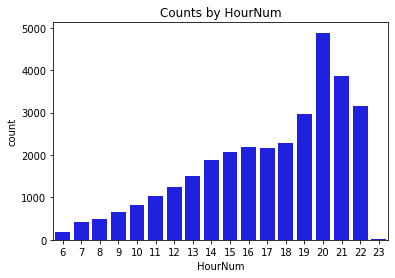

In [16]:
## Plot Counts by HourNum using sns countplot()
#df.HourNum.value_counts()

sns.countplot(data=df, x='HourNum',color='b');
plt.title('Counts by HourNum');


Shows Peak usage at 8:00 pm during the day. The other higher usages are at 9:00pm and 10:00 pm. 
And, as exepcted the usage ramps-up starting at 6:00 am.

#### Plot Counts by DayOfWeek

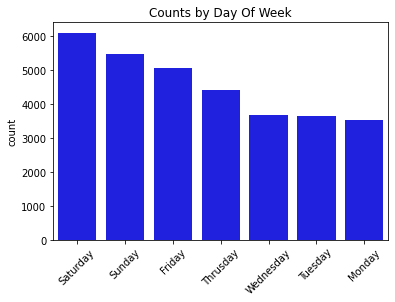

In [17]:
## Bar Plot Counts by Day Of Week

sns.barplot(data=df, x=df.DayOfWeekStr.value_counts().index, y=df.DayOfWeek.value_counts(), color='b');
plt.title('Counts by Day Of Week');
plt.xticks(rotation = 45);
plt.ylabel('count');


Weekends have the highest usage (Saturday, Sunday, Friday) and Monday has the relatively lower usage. 

### Subplot continuous variables

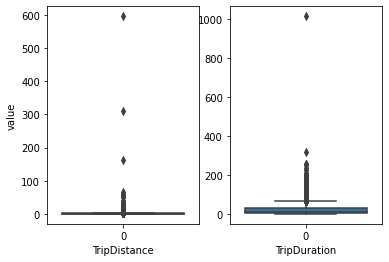

In [18]:
#Plot the continuous values TripDuration, TripDistance

fig, ((ax11, ax12)) = plt.subplots(ncols=2)

#plt.title("Box Plots for Trip Distance and Duration")

sns.boxplot(data=df.TripDistance, ax=ax11);
ax11.set_xlabel('TripDistance')
ax11.set_ylabel('value');

sns.boxplot(data=df.TripDuration, ax=ax12);
ax12.set_xlabel('TripDuration')
ax11.set_ylabel('value');


There is lots of outliers. Lets remove the outliers by 1.5* IQR for TripDistance and TripDuration

#### Outlier removal

In [19]:
### Method to subset data by iqr to eleminate outliers.

def subset_by_iqr(df, column, whisker_width=1.5):
    """Remove outliers from a dataframe by column, including optional 
       whiskers, removing rows for which the column value are 
       less than Q1-1.5IQR or greater than Q3+1.5IQR.
    Args:
        df (`:obj:pd.DataFrame`): A pandas dataframe to subset
        column (str): Name of the column to calculate the subset from.
        whisker_width (float): Optional, loosen the IQR filter by a
                               factor of `whisker_width` * IQR.
    Returns:
        (`:obj:pd.DataFrame`): Filtered dataframe
    """
    # Calculate Q1, Q2 and IQR
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    # Apply filter with respect to IQR, including optional whiskers
    filter = (df[column] >= q1 - whisker_width*iqr) & (df[column] <= q3 + whisker_width*iqr)
    return df.loc[filter]                                                     

In [20]:
# Example for whiskers = 1.5, as requested by the OP

df_filtered = subset_by_iqr(df, 'TripDistance', whisker_width=1.5)
df = df_filtered
print("Count of Rows and Columns after removing the outlier data rows based on TripDistance = " + str(df.shape))

df_filtered = subset_by_iqr(df, 'TripDuration', whisker_width=1.5)
df = df_filtered
print("Count of Rows and Columns after removing the outlier data rows based on TripDuration = " + str(df.shape))



Count of Rows and Columns after removing the outlier data rows based on TripDistance = (29624, 14)
Count of Rows and Columns after removing the outlier data rows based on TripDuration = (27795, 14)


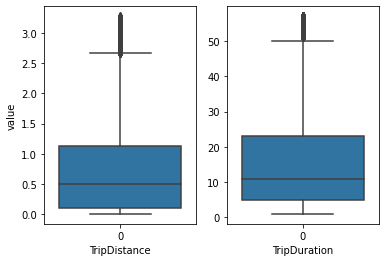

In [21]:
# Now, Repeat the Box Plots
## Plot the continuous values TripDuration, TripDistance

fig, ((ax11, ax12)) = plt.subplots(ncols=2)

sns.boxplot(data=df.TripDistance, ax=ax11);
ax11.set_xlabel('TripDistance')
ax11.set_ylabel('value');

sns.boxplot(data=df.TripDuration, ax=ax12);
ax12.set_xlabel('TripDuration')
ax11.set_ylabel('value');

### Correleation graphs

In [22]:
# pearson coefficient is a correlation indicator
# generate a pearson coefficient for each peer of variables
pearson = df.corr(method='pearson')
pearson

TripDuration  TripDistance  StartLatitude  StartLongitude  \
TripDuration        1.000000      0.279317       0.054945        0.003374   
TripDistance        0.279317      1.000000       0.009922        0.007005   
StartLatitude       0.054945      0.009922       1.000000        0.984043   
StartLongitude      0.003374      0.007005       0.984043        1.000000   
EndLatitude         0.057773      0.011269       0.998274        0.983593   
EndLongitude        0.003522      0.007211       0.984030        0.999954   
DayOfWeek           0.012513     -0.004071       0.012118        0.004278   
HourNum             0.249565      0.015948       0.044947       -0.017455   

                EndLatitude  EndLongitude  DayOfWeek   HourNum  
TripDuration       0.057773      0.003522   0.012513  0.249565  
TripDistance       0.011269      0.007211  -0.004071  0.015948  
StartLatitude      0.998274      0.984030   0.012118  0.044947  
StartLongitude     0.983593      0.999954   0.004278 -0.017455  
EndLatitude        1.000000      0.983551   0.012297  0.045539  
EndLongitude       0.983551      1.000000   0.004222 -0.017574  
DayOfWeek          0.012297      0.004222   1.000000  0.084154  
HourNum            0.045539     -0.017574   0.084154  1.000000

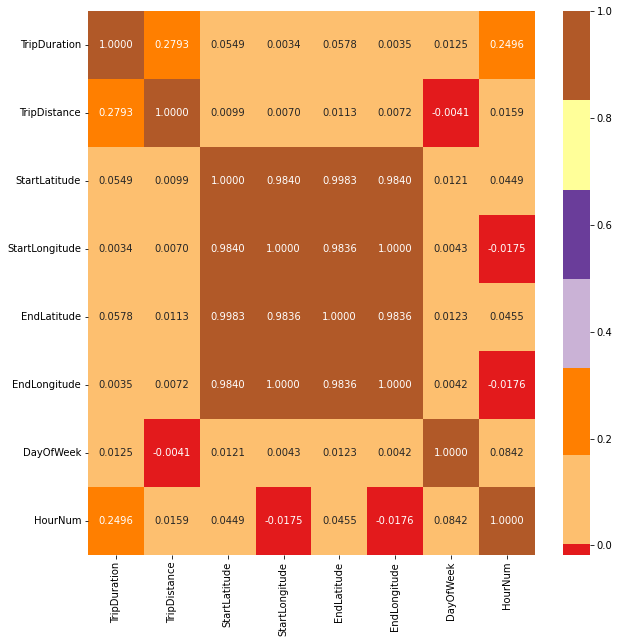

In [23]:
## Lets do correlation using heatmap

plt.figure(figsize= [10,10])
sns.heatmap(data=df.corr(), annot = True, fmt = '.4f', cmap = 'Paired', center=0);

## Insights

Though not significant

**Positive Correlation** - 
1. Trip Duration to Trip Distance
2. Trip Duration to Hour Num

**Negative Correlation** -
1. HourNum to StartLongitude
2. HourNum to EndLongitude
3. DayOfWeek to TripDistance




## Sample and Visualize

In [24]:
## SubSample data
# random selection of 1000 data points
sample = df.sample(n=1000)

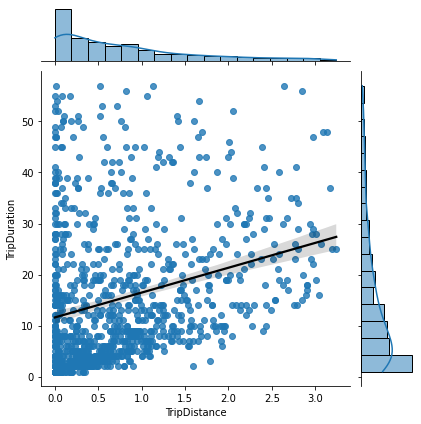

In [25]:
# visualise variable distribution using jointplot
sns.jointplot(data=df, x=sample.TripDistance, y=sample.TripDuration, palette = 'Paired', kind='reg',joint_kws={'line_kws':{'color':'black'}});


## Spatial Data 

In [26]:
#!pip install folium

In [27]:
# visualise the spatial data points on maps

import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime

In [28]:
# Louisville, KY coordinates

Louisville=[38.2527,-85.7585]

### Map of Louisville,KY

In [29]:
# map of Louisville, KY
map_louisville = folium.Map(location=Louisville,
                            zoom_start=12)
map_louisville

### Map of Start Latitude, Longitude

In [30]:
# map origin points (Start Latitude, and Start Longitude) 

map_origin = folium.Map(location=Louisville,
                            zoom_start=12)

for lat, lng in zip(sample['StartLatitude'],
                    sample['StartLongitude']):
    folium.CircleMarker([lat, lng],
                        radius=2, 
                        stroke=False, 
                        fill_color='blue',
                        fill_opacity=0.5).add_to(map_origin)

map_origin

### Cluster Map of Trips

In [31]:
# cluster points to make the map more readable
map_cluster = folium.Map(location=Louisville,
                            zoom_start=12)

cluster = folium.plugins.MarkerCluster().add_to(map_cluster)

for lat, lng in zip(sample['StartLatitude'],
                    sample['StartLongitude']):
    folium.Marker([lat, lng], tooltip=[lat,lng]).add_to(cluster)
        
map_cluster

In [32]:
## Repeat with differnet Sample, See the concentration of activity

sample2 = df.sample(n=1000)
# cluster points to make the map more readable
map_cluster = folium.Map(location=Louisville,
                            zoom_start=12)

cluster = folium.plugins.MarkerCluster().add_to(map_cluster)

for lat, lng in zip(sample2['StartLatitude'],
                    sample2['StartLongitude']):
    folium.Marker([lat, lng], tooltip=[lat,lng]).add_to(cluster)
        
map_cluster

### Heat Map of Trips

In [33]:
# visualise data points on a heatmap
heatmap = folium.Map(location=Louisville,
                            zoom_start=12)

HeatMap(data=sample[['StartLatitude', 'StartLongitude']].groupby(['StartLatitude','StartLongitude']).sum().reset_index().values.tolist(),
       radius=8, max_zoom=12).add_to(heatmap)

heatmap

### Map the Trips

In [34]:
## Map trip data (Start -> End points) 
map_trip = folium.Map(location=Louisville,
                            zoom_start=12)

for i, row in sample.iterrows():
    folium.CircleMarker([row['StartLatitude'], row['StartLongitude']],
                        radius=4,
                        stroke=False,
                        fill_color='blue',
                        fill_opacity=0.7).add_to(map_trip)
    
    folium.CircleMarker([row['EndLatitude'], row['EndLongitude']],
                        radius=4,
                        stroke=False,
                        fill_color='red',
                        fill_opacity=0.7).add_to(map_trip)
    
    folium.PolyLine([[row['StartLatitude'], row['StartLongitude']],
                    [row['EndLatitude'], row['EndLongitude']]],
                    strokeColor= "#000000"
                   ).add_to(map_trip)

map_trip

## Machine learning 

First we will build LinerRegression Model and evaluate the MAE.

Next, we will do Feature selection using DecisionTreeRegressor and then use it to build LinerRegression model and evaluate.

Lastly, we remove outliers and build & evaluate LinerRegression model. 



In [35]:
df.dtypes

TripID                    object
StartDate         datetime64[ns]
StartTime                 object
EndDate           datetime64[ns]
EndTime                   object
TripDuration               int64
TripDistance             float64
StartLatitude            float64
StartLongitude           float64
EndLatitude              float64
EndLongitude             float64
DayOfWeek                  int64
HourNum                    int64
DayOfWeekStr              object
dtype: object

### Linear Regression Model

In [36]:
## Lets predict TripDuration to TripDistance
# define X-y axis, excluding non-numerical values
y = df['TripDuration'] # dependent variable
X = df.select_dtypes(exclude=['object', 'datetime64[ns]']).drop(['TripDuration'], axis=1)

In [37]:
from sklearn.model_selection  import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=100)

In [38]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr_model = lr.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import statistics

MAE = mean_absolute_error(y_test, lr_pred)
MSE = mean_squared_error(y_test, lr_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, lr_pred)

print("MAE : %6.2f" % (MAE))
print("MSE : %6.2f" % (MSE))
print("RMSE: %6.2f" % (RMSE))
print("R2  : %6.2f" % (R2))



MAE :   9.39
MSE : 149.80
RMSE:  12.24
R2  :   0.19


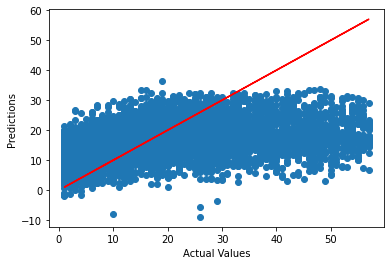

In [40]:
# Visualizing model performance
plt.scatter(y_test, lr_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')

# Ideal predictions plot
plt.plot(y_test,y_test,'r');

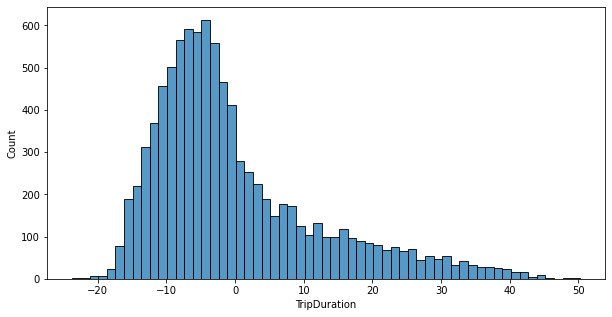

In [41]:
# Plotting residuals
fig = plt.figure(figsize=(10,5));
residuals = (y_test- lr_pred)
sns.histplot(residuals);

### DecisionTreeRegressor - Feature selection

In [42]:
# import library
from sklearn.tree import DecisionTreeRegressor

# define the model with DecisionTreeRegressor
model = DecisionTreeRegressor()
# fit the model
model.fit(X_train, y_train)

DecisionTreeRegressor()

0.3035207405855179
Feature: 0, Score: 0.30352
Feature: 1, Score: 0.08651
Feature: 2, Score: 0.10848
Feature: 3, Score: 0.19526
Feature: 4, Score: 0.12002
Feature: 5, Score: 0.08830
Feature: 6, Score: 0.09790


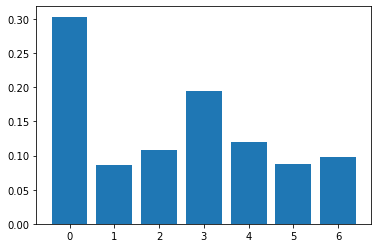

In [43]:
importance = model.feature_importances_

print(importance[0])

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [44]:
# recursive feature elimination
from sklearn.feature_selection import RFE

# define method
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=2)
# fit the model
rfe.fit(X,y)
# transform the data
X_rfe = rfe.transform(X)
print("num features: %d" % rfe.n_features_)
print("selected features: %s" % rfe.support_)
print("feature ranking: %s" % rfe.ranking_)

num features: 2
selected features: [ True False False  True False False False]
feature ranking: [1 6 3 1 2 5 4]


In [45]:
# train/test split the new dataset
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size = 0.33, random_state = 100)

In [46]:
# linear regression on refined dataset
lr = linear_model.LinearRegression()
lr_model =lr.fit(X_train, y_train)

lr_pred2 = lr_model.predict(X_test)

In [47]:
# performance metrics
MAE2 = mean_absolute_error(y_test, lr_pred2)
MSE2 = mean_squared_error(y_test, lr_pred2)
RMSE2 = np.sqrt(MSE)
R22 = r2_score(y_test, lr_pred2)
print("MAE : %6.2f" % (MAE2))
print("MSE : %6.2f" % (MSE2))
print("RMSE: %6.2f" % (RMSE2))
print("R2  : %6.2f" % (R22))

MAE :  10.33
MSE : 169.39
RMSE:  12.24
R2  :   0.08


**Reducing features didn't made the predictions better.**

It seems that the other variables such as origin/destination positions slightly plays a role in the trip duration too.

- another way to improve our machine learning algorithm will be to delete outliers from the dataset

### Remove Outliers

In [48]:
## Focus only where TripDuration is <=20min

df_20 = df[(df.TripDuration < 20)]

y_sub = df_20['TripDuration'] # dependent variable
X_sub = df_20.select_dtypes(exclude=['object','datetime64[ns]']).drop(['TripDuration'], axis=1)

In [49]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size = 0.33, random_state = 100)

In [50]:
# linear regression
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr_model =lr.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

In [51]:
# calculate statistical measures
MAE = mean_absolute_error(y_test, lr_pred)
MSE = mean_squared_error(y_test, lr_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, lr_pred)
print("MAE  : %6.2f" % (MAE))
print("MSE  : %6.2f" % (MSE))
print("RMSE : %6.2f" % (RMSE))
print("R2   : %6.2f" % (R2))

MAE  :   3.47
MSE  :  18.96
RMSE :   4.35
R2   :   0.26


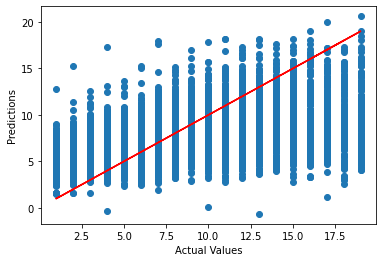

In [52]:
# Visualizing model performance
plt.scatter(y_test, lr_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')

# Ideal predictions plot
plt.plot(y_test,y_test,'r');

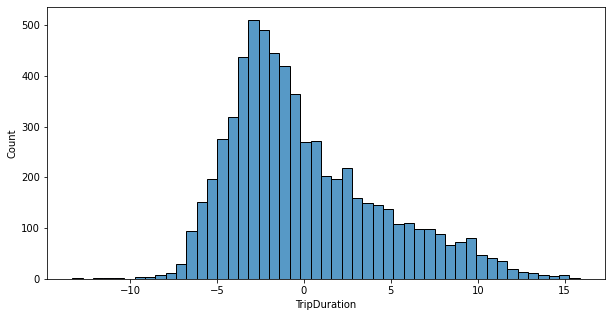

In [53]:
# Plotting residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- lr_pred)
sns.histplot(residuals);

# Conclusion

* We performed Model Selection and improved the model performance by doing feature selection and limiting the values and experienced the MAE reduction from **9.39 -> 3.47**

# Additional References


1. Open Mobility Foundation: www.openmobilityfoundation.org
2. About MDS:  https://www.openmobilityfoundation.org/about-mds/
3. Possibilities: https://www.openmobilityfoundation.org/whats-possible-with-mds/

3. GIT :  https://github.com/openmobilityfoundation/mobility-data-specification

4. SF Mobility: https://www.sfmta.com/shared-mobility-311-complaints-location
5. LA Dot:  https://ladot.io/wp-content/uploads/2018/12/What-is-MDS-Cities.pdf
